In [681]:
import glob
import numpy as np
import math
import sys
import os
import matplotlib.pyplot as plt

In [682]:
Paper_files_dir_train = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\GermanData\PaperData\paper_train\*.npz")
Batch1_files_dir_train = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch_1_train_hydro_2021\*.npz")
Batch2_files_dir_train =glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch_2_train_hydro_2021\*.npz")
High_Ca_files_dir = glob.glob(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\High_Ca_Data\*.npz")



In [739]:
#Choose direc then run script to obtain plot of data distrib

direc = Batch2_files_dir_train

#set save on or off to store locally
save = 'off'

In [722]:
#------------------------------------Obtaining target Channel---------------

In [723]:
def __get_freestream_x(idx):
  string_ = direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  fsx = data_val[0,:1,:1,]
  return fsx

In [724]:
def __get_freestream_y(idx):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  fsy = data_val[1,:1,:1,]
  return fsy

In [725]:
def __get_target_p_0(idx):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  p_0 = data_val[3,:128,:128,]
  return p_0

In [726]:
def __get_mask_2(idx):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  mask_2 = data_val[2,:128,:128,]
  return mask_2

In [727]:
def __get_target_v_x(idx):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  out_v_x_4 = data_val[4,:128,:128,]
  return out_v_x_4

In [728]:
def __get_target_v_y(idx):
  string_=direc[idx]
  data = np.load(string_)
  data_val = list(data.values())[0]
  out_v_y_5 = data_val[5,:128,:128,]
  return out_v_y_5

In [729]:
#-------------------------NORM PRESSURE--------------------

In [730]:
max_list_of_target_p_0 = []
mean_list_of_target_p_0 = []


for idx in range(0, len(direc)):
    
  if direc==Paper_files_dir_train:
      fsx_result = __get_freestream_x(idx)[0][0]

      fsy_result = __get_freestream_y(idx)[0][0]

      u_inf = math.sqrt((fsx_result**2)+(fsy_result**2))
      rho = 1
  else: 

   u_inf = 2 
   rho = 1000
    
    
  target_p_0_result = __get_target_p_0(idx)[0]
  target_p_0_result_norm1 = target_p_0_result - np.mean(target_p_0_result) 
  target_p_0_result_norm2 = target_p_0_result_norm1 - (target_p_0_result_norm1*(__get_mask_2(idx)[0])) #pressure*mask
  target_p_0_result_norm3 = target_p_0_result_norm2 / (rho*(u_inf**2))
  target_pressure = np.max(target_p_0_result_norm3).tolist()
  max_list_of_target_p_0.append(target_pressure)

  mean_target_pressure = np.mean(target_p_0_result_norm3).tolist()
  mean_list_of_target_p_0.append(mean_target_pressure)

In [731]:
final_norm_list_of_p = []
mean_final_norm_p = []

for p in max_list_of_target_p_0:
  final_norm_list_of_p.append(abs(p/(np.max(max_list_of_target_p_0))))

for p in mean_list_of_target_p_0:
  mean_final_norm_p.append(abs(p/(np.max(mean_list_of_target_p_0))))

In [732]:
#------------------------NORM V_X--------------------------------------

In [733]:
max_list_of_target_v_x_4 = []
mean_list_of_target_v_x_4 = []


for idx in range(0, len(direc)):
  
  if direc==Paper_files_dir_train:
      fsx_result = __get_freestream_x(idx)[0][0]

      fsy_result = __get_freestream_y(idx)[0][0]

      u_inf = math.sqrt((fsx_result**2)+(fsy_result**2))
    
  else: 

   u_inf = 2


  
  target_v_x_4_result = np.max(__get_target_v_x(idx)[0])
  target_v_x_4_result_norm = target_v_x_4_result / u_inf
  target_vel_x = target_v_x_4_result_norm.tolist()
  max_list_of_target_v_x_4.append(target_vel_x) 

  mean_target_v_x_4_result = np.mean(__get_target_v_x(idx)[0])
  mean_target_v_x_4_result_norm = mean_target_v_x_4_result / u_inf
  mean_target_vel_x = mean_target_v_x_4_result_norm.tolist()
  mean_list_of_target_v_x_4.append(mean_target_vel_x) 
  

In [734]:
final_norm_list_of_v_x = []
mean_final_norm_list_of_v_x = []

for vx in max_list_of_target_v_x_4:
  final_norm_list_of_v_x.append(abs(vx/(np.amax(max_list_of_target_v_x_4))))

for vx in mean_list_of_target_v_x_4:
  mean_final_norm_list_of_v_x.append(abs(vx/(np.amax(mean_list_of_target_v_x_4))))

In [735]:
#--------------------------NORM VY------------------------------------

In [736]:
max_list_of_target_v_y_5 = []
mean_list_of_target_v_y_5 = []

for idx in range(0, len(direc)):
 
  
  if direc==Paper_files_dir_train:
      fsx_result = __get_freestream_x(idx)[0][0]

      fsy_result = __get_freestream_y(idx)[0][0]

      u_inf = math.sqrt((fsx_result**2)+(fsy_result**2))
    
  else: 

   u_inf = 2

  target_v_y_5_result = np.max(__get_target_v_y(idx)[0])
  target_v_y_5_result_norm = target_v_y_5_result / u_inf
  target_vel_y = target_v_y_5_result_norm.tolist()
  max_list_of_target_v_y_5.append(target_vel_y) 

  mean_target_v_y_5_result = np.mean(__get_target_v_y(idx)[0])
  mean_target_v_y_5_result_norm = mean_target_v_y_5_result / u_inf
  mean_target_vel_y = mean_target_v_y_5_result_norm.tolist()
  mean_list_of_target_v_y_5.append(mean_target_vel_y) 

In [737]:
final_norm_list_of_v_y = []
mean_final_norm_list_of_v_y = []


for vy in max_list_of_target_v_y_5:
  final_norm_list_of_v_y.append(abs(vy/(np.amax(max_list_of_target_v_y_5))))

for vy in mean_list_of_target_v_y_5:
  mean_final_norm_list_of_v_y.append(abs(vy/(np.amax(mean_list_of_target_v_y_5))))

In [719]:
#------------------Plots--------------------------------------------------

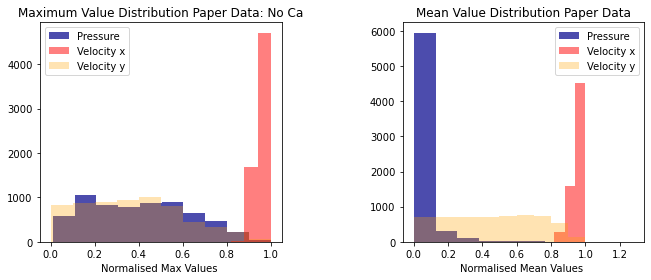

In [701]:
if direc==Paper_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Paper Data: No Ca")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Paper Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\PaperDataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

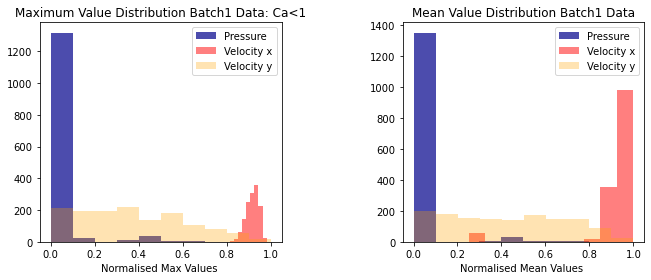

In [720]:
if direc==Batch1_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Batch1 Data: Ca<1")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Batch1 Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch1DataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

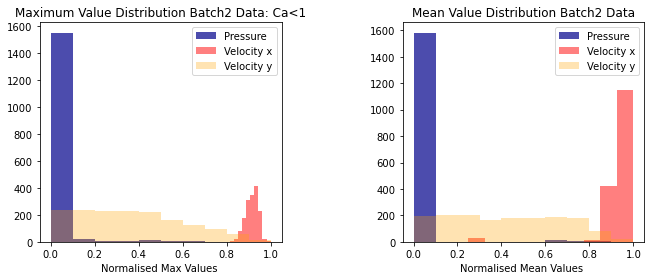

In [740]:
if direc==Batch2_files_dir_train:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Batch2 Data: Ca<1")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Batch2 Data")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\Batch2DataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()

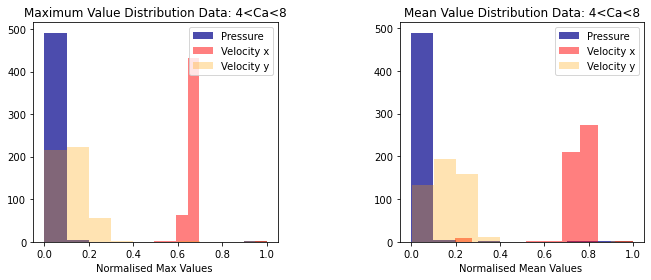

In [643]:
if direc==High_Ca_files_dir:

 plt.subplot(1,2,1)
 plt.xlabel("Normalised Max Values ")
 plt.title("Maximum Value Distribution Data: 4<Ca<8")
 plt.hist(final_norm_list_of_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplot(1,2,2)
 plt.xlabel("Normalised Mean Values ")
 plt.title("Mean Value Distribution Data: 4<Ca<8")
 plt.hist(mean_final_norm_p, label= "Pressure", alpha=0.7, color="darkblue")
 plt.hist(mean_final_norm_list_of_v_x, label = "Velocity x", alpha= 0.5, color="red")
 plt.hist(mean_final_norm_list_of_v_y, label= "Velocity y", alpha=0.3, color="orange")
 plt.legend()
 plt.tight_layout()

 plt.subplots_adjust(right=1.5, wspace=0.5)
 if save=='on':
     plt.savefig(r"C:\Users\bira1\OneDrive\Uni MSc\Individual Project\Data\Data for analysis\HighCaDataAnalysis.png", dpi=300, bbox_inches='tight')
 plt.show()